# 1.Tổng quan bài toán

### Airline Passenger Satisfaction
What factors lead to customer satisfaction for an Airline?

- `Gender`: Gender of the passengers (Female, Male)
- `Customer Type`: The customer type (Loyal customer, disloyal customer)
- `Age`: The actual age of the passengers
- `Type of Travel`: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- `Class`: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- `Flight distance`: The flight distance of this journey
- `Inflight wifi service`: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- `Departure/Arrival time convenient`: Satisfaction level of Departure/Arrival time convenient
- `Ease of Online booking`: Satisfaction level of online booking
- `Gate location`: Satisfaction level of Gate location
- `Food and drink`: Satisfaction level of Food and drink
- `Online boarding`: Satisfaction level of online boarding
- `Seat comfort`: Satisfaction level of Seat comfort
- `Inflight entertainment`: Satisfaction level of inflight entertainment
- `On-board service`: Satisfaction level of On-board service
- `Leg room service`: Satisfaction level of Leg room service
- `Baggage handling`: Satisfaction level of baggage handling
- `Check-in service`: Satisfaction level of Check-in service
- `Inflight service`: Satisfaction level of inflight service
- `Cleanliness`: Satisfaction level of Cleanliness
- `Departure Delay in Minutes`: Minutes delayed when departure
- `Arrival Delay in Minutes`: Minutes delayed when Arrival
- `Satisfaction`: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## 1.1 Load các package cần thiết


In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 1.2 Load tập dữ liệu

In [207]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2.Khai phá dữ liệu

## 2.1 Tổng quan dữ liệu

In [208]:
train.shape, test.shape

((103904, 25), (25976, 25))

- In ra một vài mẫu dữ liệu

In [209]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


- In ra tên của các đặc trưng

In [210]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [211]:
train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

- Xem tóm tắt một số đặc điểm về tập dữ liệu

In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

- Xem các thuộc tính thống kê của tập dữ liệu

In [213]:
train.describe(include=['int64', 'float64'])

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [214]:
train.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## 2.2 Phân tích đơn biến

Đặc trưng muốn dự đoán là `satisfaction`

- Kiểm tra giá trị khuyết

In [215]:
train.satisfaction.isnull().sum()

0

- Kểm tra số lượng nhãn của đặc trưng

In [216]:
train.satisfaction.nunique()

2

In [217]:
train.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

- Xem phân phối tần suất của các giá trị

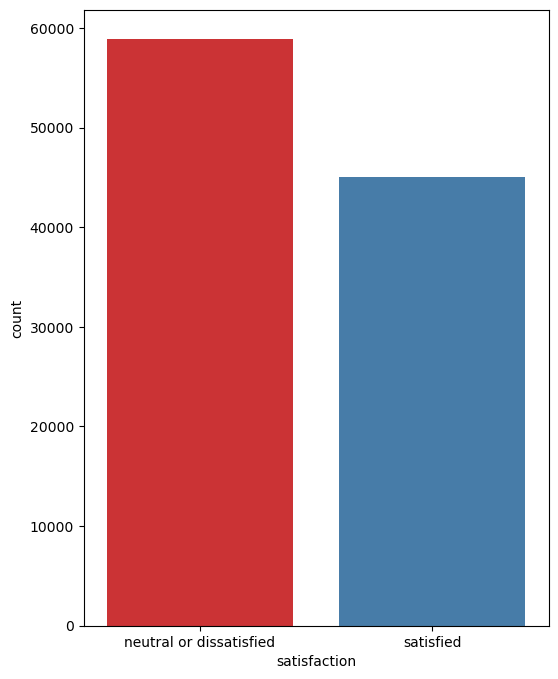

In [218]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x='satisfaction', data=train, palette="Set1")
plt.show()

In [219]:
train.satisfaction.value_counts()/len(train)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

## 2.3 Phân tích song biến

### 2.3.1 Khám phá các biến hạng mục

In [220]:
categorical = [col for col in train.columns if train[col].dtype == 'object']
categorical

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [221]:
train[categorical].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


- Kiểm tra các giá trị bị khuyết

In [222]:
train[categorical].isnull().sum()

Gender            0
Customer Type     0
Type of Travel    0
Class             0
satisfaction      0
dtype: int64

In [223]:
test[categorical].isnull().sum()

Gender            0
Customer Type     0
Type of Travel    0
Class             0
satisfaction      0
dtype: int64

- Số lượng nhãn trong từng biến hạng mục

In [224]:
for val in categorical:
    print('{} has {} unique values'.format(val, train[val].nunique()))

Gender has 2 unique values
Customer Type has 2 unique values
Type of Travel has 2 unique values
Class has 3 unique values
satisfaction has 2 unique values


### 2.3.2 Khám phá các biến giá trị số

In [225]:
numberical = [col for col in train.columns if train[col].dtype != 'object']
numberical

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

- kiểm tra các giá trị bị khuyết́

In [226]:
train[numberical].isnull().sum()

Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
dtype: int64

In [227]:
train[numberical].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- Tìm các dữ liệu ngoại lai

In [228]:
for val in numberical:
    IQR = train[val].quantile(0.75) - train[val].quantile(0.25)
    lower = train[val].quantile(0.25) - (IQR * 3)
    upper = train[val].quantile(0.75) + (IQR * 3)
    print('{} has {} outliers'.format(val, len(train[(train[val] < lower) | (train[val] > upper)])))

Age has 0 outliers
Flight Distance has 0 outliers
Inflight wifi service has 0 outliers
Departure/Arrival time convenient has 0 outliers
Ease of Online booking has 0 outliers
Gate location has 0 outliers
Food and drink has 0 outliers
Online boarding has 0 outliers
Seat comfort has 0 outliers
Inflight entertainment has 0 outliers
On-board service has 0 outliers
Leg room service has 0 outliers
Baggage handling has 0 outliers
Checkin service has 0 outliers
Inflight service has 0 outliers
Cleanliness has 0 outliers
Departure Delay in Minutes has 9318 outliers
Arrival Delay in Minutes has 8643 outliers


## 2.4 Phân tích đa biến

- Vễ bản đồ nhiệt (heat map) của ma trận tương quan

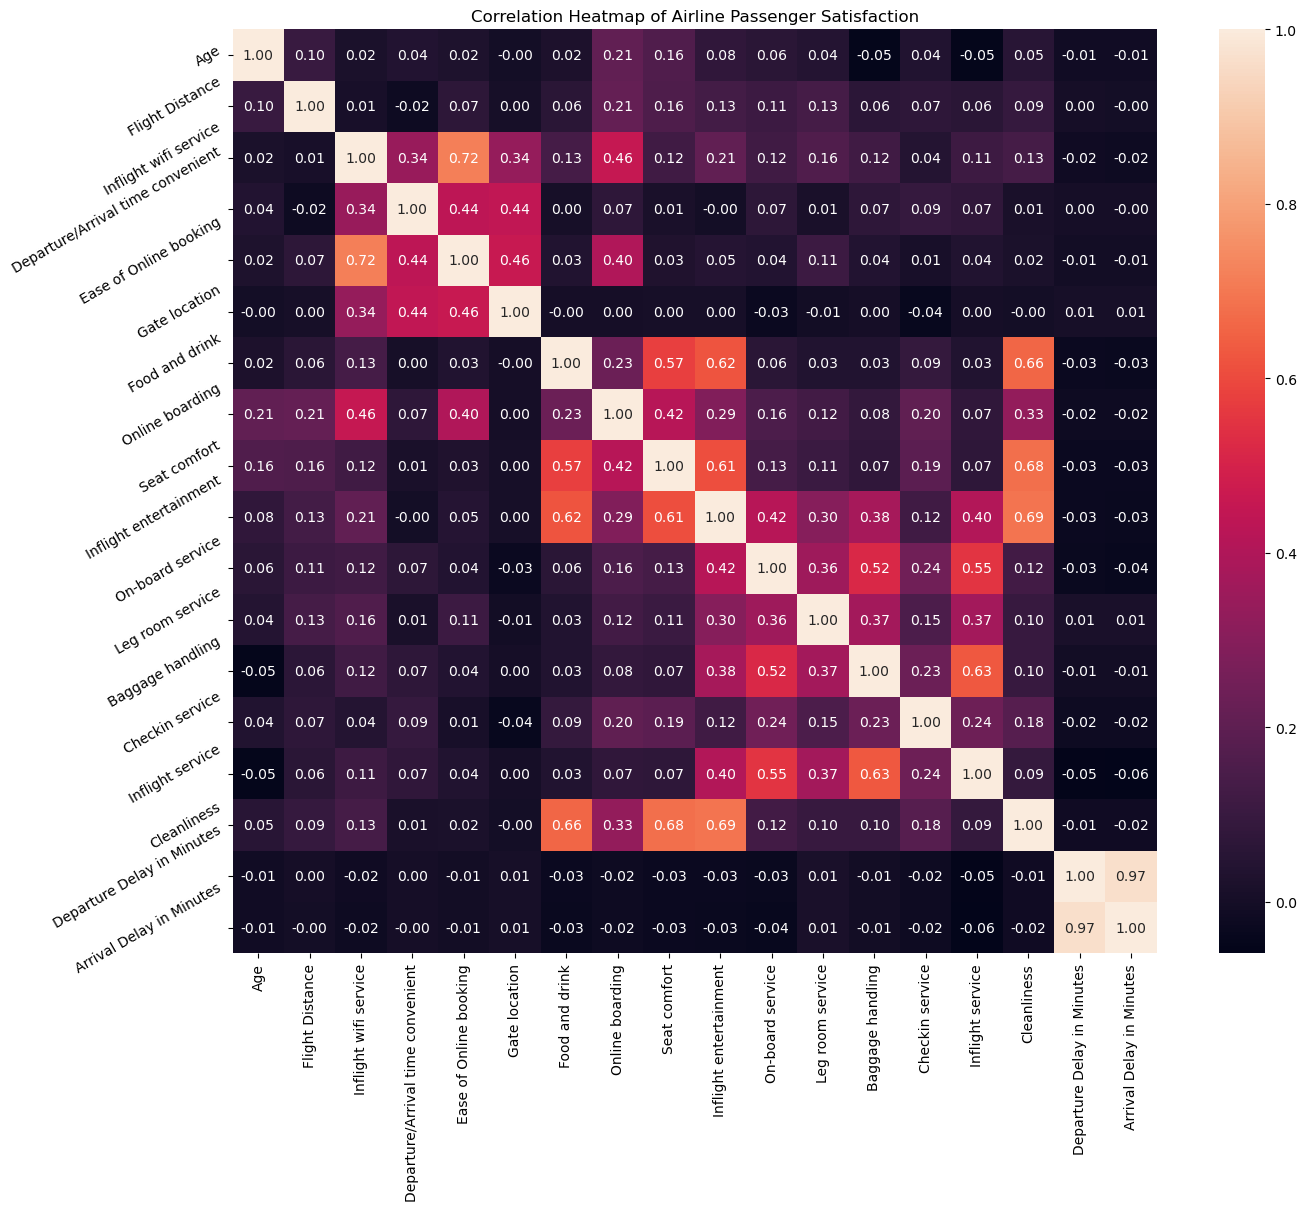

In [229]:
correlation = train.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Airline Passenger Satisfaction')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

- Thể hiện rõ hơn mối quan hệ tương quan của các biến có mức độ tương quan mạnh

In [230]:
# num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
# sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

# 3.Tiền xử lý dữ liệu

Chúng ta sẽ tiến hành làm sạch dữ liệu trước khi chúng ta huấn luyện mô hình. Ở bước này chúng ta sẽ:

1. Điền giá trị vào các đặc trưng bị khuyết
2. Loại bỏ các ngoại lai
3. Mã hóa các đặc trưng tùy vào loại biến

- Chuẩn bị tập dữ liệu

In [231]:
X_train = train.drop('satisfaction', axis=1)
y_train = train.satisfaction
X_test = test.drop('satisfaction', axis=1)
y_test = test.satisfaction
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103904, 22), (103904,), (25976, 22), (25976,))

- Chia biến hạng mục và biến giá trị số

In [232]:
categorical = [col for col in X_train.columns if X_train[col].dtype == 'object']
numberical = [col for col in X_train.columns if X_train[col].dtype != 'object']

- Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [233]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train.shape, X_test.shape

## 3.1 Xử lý đặc trưng bị khuyết

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#1110-automatic-selection-of-best-imputation-technique-with-sklearn)

In [234]:
missing_category = [col for col in X_train.columns if X_train[col].isnull().sum() > 0 and X_train[col].dtype == 'object']
missing_numberical = [col for col in X_train.columns if X_train[col].isnull().sum() > 0 and X_train[col].dtype != 'object']

In [235]:
missing_category

[]

In [236]:
missing_numberical

['Arrival Delay in Minutes']

In [237]:
# Median/Mean imputation
from feature_engine.imputation import MeanMedianImputer

imputer = MeanMedianImputer(imputation_method='mean',variables= missing_numberical)

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


## 3.2 Xử lý ngoại lai của biến giá trị số

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#12-outliers)

In [238]:
from feature_engine.outliers import Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3)
winsorizer.fit(X_train)
X_train = winsorizer.transform(X_train)
X_test = winsorizer.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103904, 22), (103904,), (25976, 22), (25976,))

## 3.3 Mã hóa các biến hạng mục

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#13-categories-encoding)

**Mã hoá target**

In [239]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [240]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

**Mã hoá các biến categorical**

In [241]:
from feature_engine.encoding import OneHotEncoder

enc = OneHotEncoder(top_categories=None, variables=categorical, drop_last=False)
enc.fit(X_train)
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [242]:
X_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Male,Gender_Female,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Type of Travel_Business travel,Class_Eco Plus,Class_Business,Class_Eco
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,18.0,1,0,1,0,1,0,1,0,0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,...,6.0,1,0,0,1,0,1,0,1,0
2,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,...,0.0,0,1,1,0,0,1,0,1,0
3,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,...,9.0,0,1,1,0,0,1,0,1,0
4,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,...,0.0,1,0,1,0,0,1,0,1,0


## 3.4 Rời rạc hóa dữ liệu giá trị số

In [243]:
# from feature_engine.discretisation import EqualFrequencyDiscretiser
# disc = EqualFrequencyDiscretiser(q=10, variables = numerical)
# disc.fit(X_train[numerical])

## 3.5 Feature Scaling

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#15-feature-scaling)

In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103904, 27), (103904,), (25976, 27), (25976,))

# 4.Lựa chọn đặc trưng

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#17-features-selection)

## 4.1 Loại các đặc trưng bị trùng

- Đầu tiên là chúng ta sẽ loại bỏ các đặc trưng bị trùng

In [245]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
])

pipe.fit(X_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103904, 22), (103904,), (25976, 22), (25976,))

# 5.Huấn luyện mô hình

In [246]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

models_dict = {
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=4),
    'adaboost_classifier': AdaBoostClassifier(),
    'gradientboost_classifier': GradientBoostingClassifier(),
    'xgboost_classifier': XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, 
                     learning_rate=0.03, nthread=4, subsample=0.95, 
                     colsample_bytree=0.85, seed=0),
}

In [247]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

for model_name, model in models_dict.items():
    scores = cross_validate(model, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=4)
    print('Model: {}, Mean AUC: {}, Std AUC: {}'.format(model_name, scores['test_score'].mean(), scores['test_score'].std()))

Model: random_forest, Mean AUC: 0.9934659613697203, Std AUC: 0.0001957800657471086
Model: adaboost_classifier, Mean AUC: 0.9773579615290685, Std AUC: 0.00041802344552555813
Model: gradientboost_classifier, Mean AUC: 0.9874940891182371, Std AUC: 0.000331635412067197


/Users/ngothai/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ngothai/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ngothai/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ngothai/opt/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: T

[15:42:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

**random_forest** và **xgboost_classifier** cho chất lượng tốt nhất

In [251]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=4)
random_forest.fit(X_train, y_train)
score = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1])
print('Test AUC: {}'.format(score))

Test AUC: 0.9936968785471257


In [252]:
xgboots = XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, 
                     learning_rate=0.03, nthread=4, subsample=0.95, 
                     colsample_bytree=0.85, seed=0)

xgboots.fit(X_train, y_train)
score = roc_auc_score(y_test, xgboots.predict_proba(X_test)[:,1])
print('Test AUC: {}'.format(score))

[15:47:09] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test AUC: 0.9931266695747896


# 6.Save & Load mô hình

- Chúng ta sẽ sử dụng thư viện [joblib](https://joblib.readthedocs.io/en/latest/) để save và load mô hình, ngoài ra chúng ta còn có thể sử dụng thư viện [pickle](https://docs.python.org/2/library/pickle.html).

In [248]:
from joblib import dump, load

- Save mô hình

In [249]:
# clf = MLPClassifier(hidden_layer_sizes=(100, 50, ), max_iter=300)
# clf.fit(train, y_train)
# dump(clf, 'nn_model.joblib')

- Load mô hình

In [250]:
# clf_nn = load('nn_model.joblib')
# clf_nn